# Project Desription
#### PROBLEM STATEMENT     

"This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy."

#### GOAL OF THE PROJECT    

We are required to model the different features of the given mushroom species and predict if a mushroom is 'edible' or 'poisonous.

#### DATA SOURCE  
* FROM Kaggle - https://www.kaggle.com/uciml/mushroom-classification

**Okay so prima facie, lets import some of the libraries we will be needing for this project.**  
(even if we are missing out on some library, we can always import it later on in the project.)

In [1]:
import sys

# library to handle vectorized data 
import numpy as np 

# library for data analsysis and manupulation
import pandas as pd 

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Loading the data.

In [2]:
data = pd.read_csv('mushrooms.csv')
# let's check the size of our dataset.
data.shape 

(8124, 23)

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# let's check the frequencies of the different classes for our features
for col in data.columns : 
    print(data[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

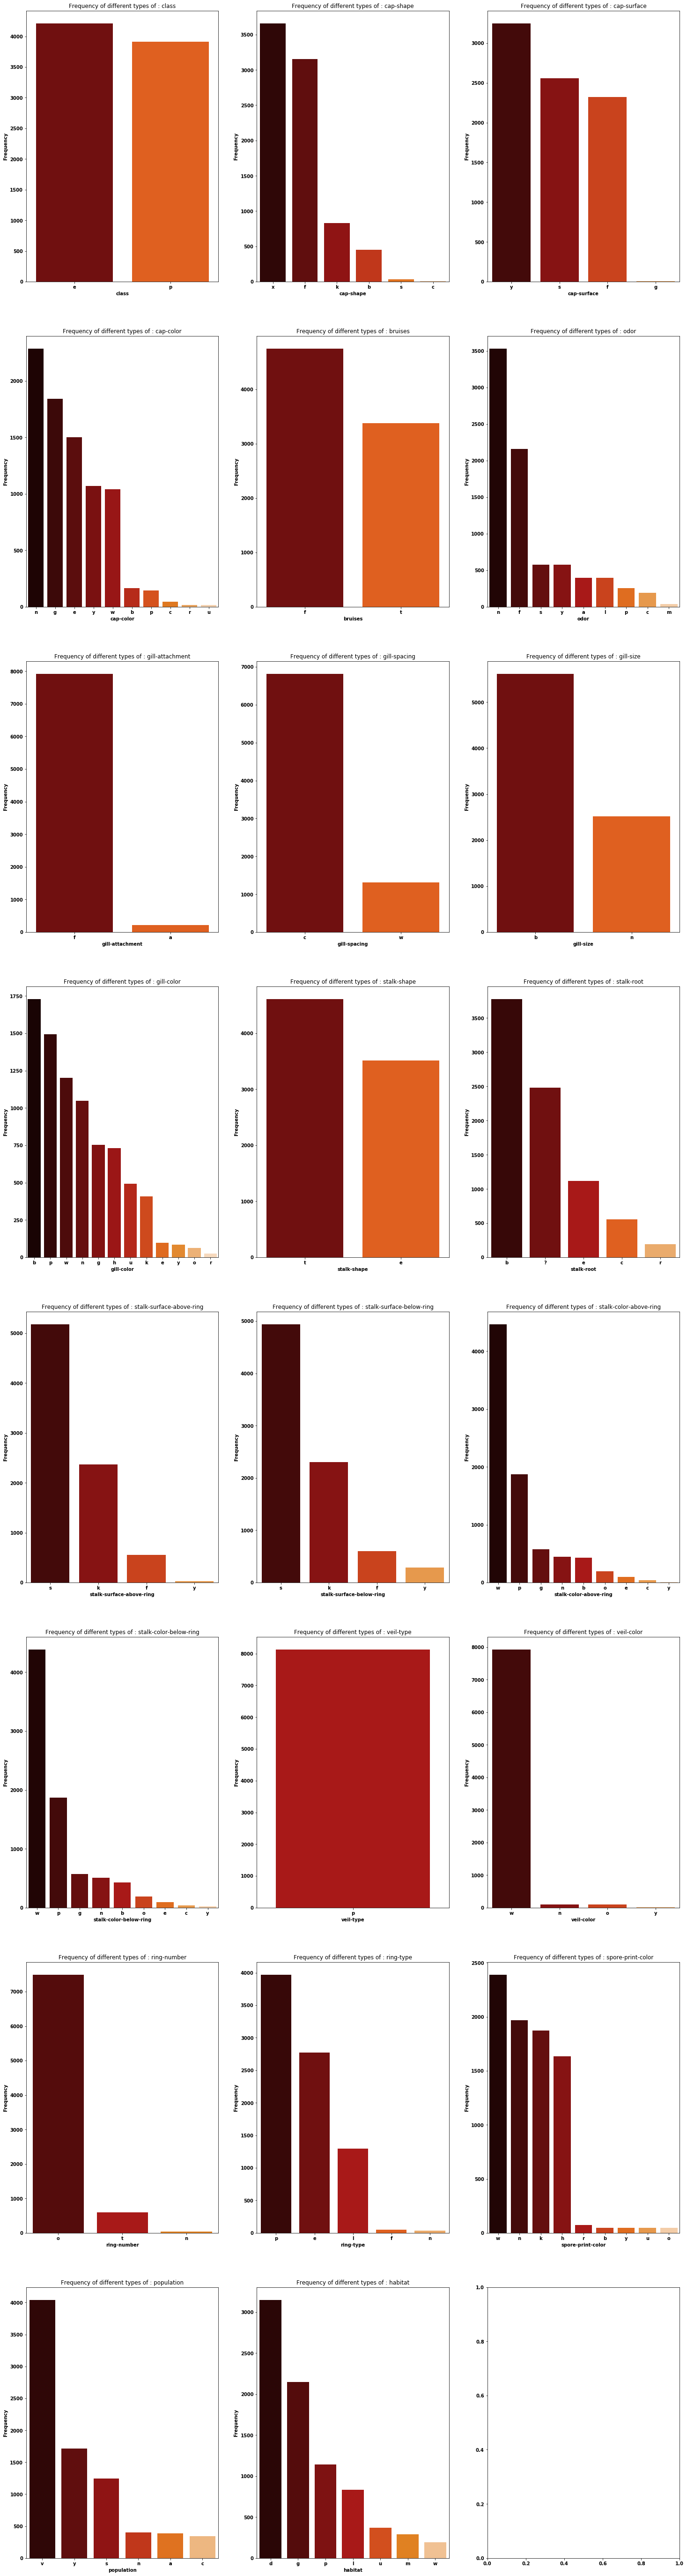

In [5]:
# lets visualize the above numbers for all the features of our dataset.
f, axes = plt.subplots(8, 3, figsize=(25,100))
features = list(data.columns)
for feature, x in zip(features, range(len(features))) :
    sns.barplot(x=data[feature].value_counts().index, y=data[feature].value_counts().values, data=data, palette="gist_heat", ax=axes.flatten()[x])
    axes.flatten()[x].set_title('Frequency of different types of : {}'.format(feature))
    axes.flatten()[x].set_ylabel("Frequency")
    axes.flatten()[x].set_xlabel("{}".format(feature))

# Handling missing values.

In [6]:
# Let's check for missing values in the dataset
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see from above, the is no missing values present in our dataset.

# Outlier detection in features according to class frequencies.

As we can see from the above plottings, in every feature there exists some classes with relatively insignificant frequencies. These classes are treated as a kind of outliers in the cases of categorical data.  
In order to improve the signal-noise ratio of the fetures, we will be grouping these classes together to represent a single class of a particular feature.  

In [7]:
'''
let's filter out the classes with relatively insignificant frequencies for every feature.
******ASSUMPTION >>>> if class frequency is less than 10% of the length of the feature; then it is to be grouped******
Making a dictionary with keys from the independent features from our data,
and assigning a list of classes for each of those features which need to be grouped together.
This dictionary will be further used for grouping the various classes in all the independent features.
'''
class_removal_dict ={k: [] for k in data.drop('class', axis=1).columns} # removing our TARGET from this step.

for feature in class_removal_dict.keys() : 
    util_list=[]
    for x,y in zip(np.nditer((data[feature].value_counts().values/len(data))*100), data[feature].value_counts().index) :
        if x<=10:
            util_list.append(y)
    class_removal_dict[feature].append(util_list)
class_removal_dict

{'cap-shape': [['b', 's', 'c']],
 'cap-surface': [['g']],
 'cap-color': [['b', 'p', 'c', 'r', 'u']],
 'bruises': [[]],
 'odor': [['s', 'y', 'a', 'l', 'p', 'c', 'm']],
 'gill-attachment': [['a']],
 'gill-spacing': [[]],
 'gill-size': [[]],
 'gill-color': [['g', 'h', 'u', 'k', 'e', 'y', 'o', 'r']],
 'stalk-shape': [[]],
 'stalk-root': [['c', 'r']],
 'stalk-surface-above-ring': [['f', 'y']],
 'stalk-surface-below-ring': [['f', 'y']],
 'stalk-color-above-ring': [['g', 'n', 'b', 'o', 'e', 'c', 'y']],
 'stalk-color-below-ring': [['g', 'n', 'b', 'o', 'e', 'c', 'y']],
 'veil-type': [[]],
 'veil-color': [['n', 'o', 'y']],
 'ring-number': [['t', 'n']],
 'ring-type': [['f', 'n']],
 'spore-print-color': [['r', 'b', 'y', 'u', 'o']],
 'population': [['n', 'a', 'c']],
 'habitat': [['u', 'm', 'w']]}

In [8]:
'''
As we can see from above that,
the values for the keys in our dict has nested lists,
whereas it is unecessary for such a data sructure in this case,
so we will be flattening the values of all the keys in our dictionary,
in order to get the value as a single list.
'''
from functools import reduce
import operator
for feature, _class in class_removal_dict.items():
    class_removal_dict[feature] = reduce(operator.concat, _class)
class_removal_dict

{'cap-shape': ['b', 's', 'c'],
 'cap-surface': ['g'],
 'cap-color': ['b', 'p', 'c', 'r', 'u'],
 'bruises': [],
 'odor': ['s', 'y', 'a', 'l', 'p', 'c', 'm'],
 'gill-attachment': ['a'],
 'gill-spacing': [],
 'gill-size': [],
 'gill-color': ['g', 'h', 'u', 'k', 'e', 'y', 'o', 'r'],
 'stalk-shape': [],
 'stalk-root': ['c', 'r'],
 'stalk-surface-above-ring': ['f', 'y'],
 'stalk-surface-below-ring': ['f', 'y'],
 'stalk-color-above-ring': ['g', 'n', 'b', 'o', 'e', 'c', 'y'],
 'stalk-color-below-ring': ['g', 'n', 'b', 'o', 'e', 'c', 'y'],
 'veil-type': [],
 'veil-color': ['n', 'o', 'y'],
 'ring-number': ['t', 'n'],
 'ring-type': ['f', 'n'],
 'spore-print-color': ['r', 'b', 'y', 'u', 'o'],
 'population': ['n', 'a', 'c'],
 'habitat': ['u', 'm', 'w']}

Okay now that we know the classes in each feature that needs to be grouped together, the only thing left is to execute the grouping.

In [9]:
for feature in class_removal_dict.keys():
    if len(class_removal_dict[feature]) != 0:
        for i in range(len(data)):
            if data.loc[i,feature] in class_removal_dict[feature]:
                data.loc[i,feature] = 'other'       

In [10]:
# checking if the execution was correct or not
for col in data.columns:
    print(data[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x        3656
f        3152
k         828
other     488
Name: cap-shape, dtype: int64
y        3244
s        2556
f        2320
other       4
Name: cap-surface, dtype: int64
n        2284
g        1840
e        1500
y        1072
w        1040
other     388
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n        3528
other    2436
f        2160
Name: odor, dtype: int64
f        7914
other     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
other    2654
b        1728
p        1492
w        1202
n        1048
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b        3776
?        2480
e        1120
other     748
Name: stalk-root, dtype: int64
s        5176
k        2372
other     576
Name: stalk-surface-above-ring, dtype: int64
s        4936
k        2304
other     884
Name: stalk-sur

# Feature Encoding.

The features in our data represent differnt physical attributes of the mushrooms, which are identifiable by an ordinary individual.  
Each feature has multiple classes in them, and in all the features these classes are nomial classes, i.e. their is no ordinal relation between the classes of the features.  
We are going to use LabelEncoder for our target feture, and OneHotEncoder for our predictor features.

In [11]:
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder)

In [12]:
# first let's encode our target feature 'class'.
data['class'] = LabelEncoder().fit_transform(data['class'])
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [13]:
# definig the encoder object as 'ohe'
ohe = OneHotEncoder(sparse=False, drop='first')
# filtering the features that are to be one hot encoded
for feature in data.select_dtypes('object'):
    enc_feature_df = pd.DataFrame(ohe.fit_transform(data[feature].values.reshape(-1,1)))
    # making an empty list for the encoded feature names
    column_names = []
    for i in range(len(list(ohe.get_feature_names()))) :
        column_names.append(list(ohe.get_feature_names())[i].split('_')[1])
        column_names[i] = feature + '_' + column_names[i]
    enc_feature_df.columns = column_names
    data = pd.concat([enc_feature_df,data], axis=1)
    data.drop(feature, axis=1, inplace=True)

In [14]:
# let's check the dimension of our encoded data
data.shape

(8124, 50)

In [15]:
data.head()

,habitat_g,habitat_l,habitat_other,habitat_p,population_s,population_v,population_y,spore-print-color_k,spore-print-color_n,spore-print-color_other,...,cap-color_other,cap-color_w,cap-color_y,cap-surface_other,cap-surface_s,cap-surface_y,cap-shape_k,cap-shape_other,cap-shape_x,class
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


# Splitting the data for testing purposes.

In [16]:
x_data = data.drop('class', axis=1)
y_data = data['class']
print(x_data.shape, y_data.shape)

(8124, 49) (8124,)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=784, stratify=y_data)
print('''Dimension of training datsets are as follows :
        \nx_train : {}
        \ny_train : {}'''.format(x_train.shape, y_train.shape))
print('''Dimension of testing datasets are as folows : 
        \nx_test : {}
        \ny_test : {}'''.format(x_test.shape, y_test.shape))

Dimension of training datsets are as follows :
        
x_train : (6499, 49)
        
y_train : (6499,)
Dimension of testing datasets are as folows : 
        
x_test : (1625, 49)
        
y_test : (1625,)


Let's check for imbalance in our target feature in the training dataset.

In [18]:
y_train.value_counts()

0    3366
1    3133
Name: class, dtype: int64

In [19]:
y_test.value_counts()

0    842
1    783
Name: class, dtype: int64

As we can see from above that the target feature in our training dataset is not imbalanced.  
Hence we can move forward with the modelling.

# Feture Scalling.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [21]:
x_train_scaled.head()

,habitat_g,habitat_l,habitat_other,habitat_p,population_s,population_v,population_y,spore-print-color_k,spore-print-color_n,spore-print-color_other,...,cap-color_n,cap-color_other,cap-color_w,cap-color_y,cap-surface_other,cap-surface_s,cap-surface_y,cap-shape_k,cap-shape_other,cap-shape_x
0,-0.5985,-0.335069,-0.339032,2.467233,-0.422401,1.004472,-0.521364,-0.543503,-0.570065,-0.178647,...,-0.617730,-0.222666,-0.385274,-0.394701,-0.02149,-0.672043,-0.820796,-0.33762,-0.250245,1.103671
1,-0.5985,-0.335069,-0.339032,-0.405312,-0.422401,1.004472,-0.521364,-0.543503,-0.570065,-0.178647,...,1.618831,-0.222666,-0.385274,-0.394701,-0.02149,1.488000,-0.820796,-0.33762,-0.250245,1.103671
2,-0.5985,-0.335069,-0.339032,-0.405312,-0.422401,-0.995548,1.918047,-0.543503,1.754185,-0.178647,...,1.618831,-0.222666,-0.385274,-0.394701,-0.02149,-0.672043,1.218330,-0.33762,-0.250245,-0.906067
3,-0.5985,-0.335069,-0.339032,-0.405312,-0.422401,-0.995548,1.918047,-0.543503,1.754185,-0.178647,...,-0.617730,-0.222666,-0.385274,-0.394701,-0.02149,-0.672043,1.218330,-0.33762,-0.250245,-0.906067
4,-0.5985,-0.335069,-0.339032,2.467233,2.367419,-0.995548,-0.521364,1.839916,-0.570065,-0.178647,...,-0.617730,-0.222666,-0.385274,2.533565,-0.02149,-0.672043,1.218330,-0.33762,-0.250245,-0.906067


In [22]:
x_test_scaled.head()

,habitat_g,habitat_l,habitat_other,habitat_p,population_s,population_v,population_y,spore-print-color_k,spore-print-color_n,spore-print-color_other,...,cap-color_n,cap-color_other,cap-color_w,cap-color_y,cap-surface_other,cap-surface_s,cap-surface_y,cap-shape_k,cap-shape_other,cap-shape_x
0,-0.598500,2.984462,-0.339032,-0.405312,-0.422401,1.004472,-0.521364,-0.543503,-0.570065,-0.178647,...,-0.617730,-0.222666,-0.385274,-0.394701,-0.02149,1.488000,-0.820796,2.961914,-0.250245,-0.906067
1,-0.598500,2.984462,-0.339032,-0.405312,-0.422401,1.004472,-0.521364,-0.543503,-0.570065,-0.178647,...,1.618831,-0.222666,-0.385274,-0.394701,-0.02149,-0.672043,1.218330,-0.337620,-0.250245,-0.906067
2,1.670843,-0.335069,-0.339032,-0.405312,-0.422401,-0.995548,-0.521364,-0.543503,1.754185,-0.178647,...,1.618831,-0.222666,-0.385274,-0.394701,-0.02149,1.488000,-0.820796,-0.337620,-0.250245,1.103671
3,-0.598500,-0.335069,-0.339032,2.467233,-0.422401,-0.995548,1.918047,-0.543503,-0.570065,-0.178647,...,-0.617730,-0.222666,-0.385274,2.533565,-0.02149,-0.672043,1.218330,-0.337620,-0.250245,-0.906067
4,-0.598500,-0.335069,-0.339032,2.467233,-0.422401,1.004472,-0.521364,-0.543503,-0.570065,-0.178647,...,1.618831,-0.222666,-0.385274,-0.394701,-0.02149,1.488000,-0.820796,-0.337620,-0.250245,1.103671


# Hyper parameter optimization, to find the best classification model for our data.